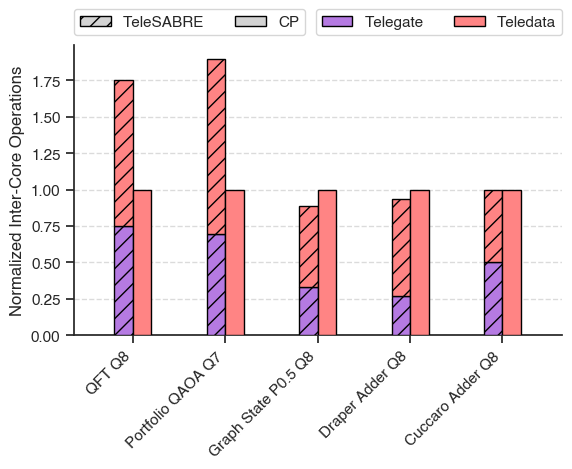

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Helvetica'

cp_data = pd.read_csv('../results/cp_results.csv')
ours_data = pd.read_csv('../cp_results/results.csv')
ours_data = ours_data.loc[ours_data.groupby('circuit')['teledata'].idxmin()]

group_names = []
telegate_data = []
teledata_data = []
for circuit in cp_data.circuit.unique():
    group_names.append(circuit)
    cp_teledata = cp_data.loc[cp_data.circuit == circuit].teledata.values[0]
    ours_teledata = ours_data.loc[ours_data.circuit == circuit].teledata.values[0]
    cp_telegate = cp_data.loc[cp_data.circuit == circuit].telegate.values[0]
    ours_telegate = ours_data.loc[ours_data.circuit == circuit].telegate.values[0]
    
    tot_cp = cp_teledata + cp_telegate
    tot_ours = ours_teledata + ours_telegate
    cp_teledata = cp_teledata / tot_cp
    cp_telegate = cp_telegate / tot_cp
    ours_teledata = ours_teledata / tot_cp
    ours_telegate = ours_telegate / tot_cp
    telegate_data.append([ours_telegate, cp_telegate])
    teledata_data.append([ours_teledata, cp_teledata])


name_map = {
    "QFT_8": "QFT Q8",
    "portfolioqaoa_nativegates_ibm_qiskit_opt3_7": "Portfolio QAOA Q7",
    "GraphState_p0": "Graph State P0.5 Q8",
    "DraperQFTAdder_8": "Draper Adder Q8",
    "CDKMRippleCarryAdder_8": "Cuccaro Adder Q8"
}
group_names = [name_map.get(name, name) for name in group_names]

# Convert lists to numpy arrays for easier manipulation
telegate_data = np.array(telegate_data)
teledata_data = np.array(teledata_data)

# Data for the chart
#group_names = ['Group A', 'Group B', 'Group C', 'Group D']
#segment1_data = np.array([[10, 15], [12, 18], [8, 12], [15, 10]])  # First stack segment [bar1, bar2]
#segment2_data = np.array([[5, 8], [7, 4], [10, 6], [7, 12]])       # Second stack segment [bar1, bar2]



# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 5))
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

color1 = '#b57ae2'
color2 = '#FF8484'

# Width of each bar
bar_width = 0.2

# Calculate positions of bars
indices = np.arange(len(group_names))
r1 = indices - bar_width/2
r2 = indices + bar_width/2

# Create the bars
# First bar in each group (with hatching)
bottom1 = np.zeros(len(group_names))
p1_1 = ax.bar(r1, telegate_data[:, 0], bar_width, bottom=bottom1, color=color1, hatch='//', edgecolor='black', zorder=4)
p1_2 = ax.bar(r1, teledata_data[:, 0], bar_width, bottom=telegate_data[:, 0], color=color2, hatch='//', edgecolor='black', zorder=4)

# Second bar in each group (no hatching)
bottom2 = np.zeros(len(group_names))
p2_1 = ax.bar(r2, telegate_data[:, 1], bar_width, bottom=bottom2, color=color1, edgecolor='black', zorder=4)
p2_2 = ax.bar(r2, teledata_data[:, 1], bar_width, bottom=telegate_data[:, 1], color=color2, edgecolor='black', zorder=4)

# Add labels, title, and legend
ax.set_ylabel('Normalized Inter-Core Operations')
ax.set_xticks(indices)
ax.set_xticklabels(group_names)
#ax.legend()

# 45 degree labels
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability

patches = []
hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', hatch='//', edgecolor="black")
patches.append(hatch_patch)
no_hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', edgecolor="black")  
patches.append(no_hatch_patch)
labels = ["TeleSABRE", "CP"]
legend1 = plt.legend(patches, labels, loc='upper right', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.49, 1.15),)


patches = [plt.Rectangle((0, 0), 1, 1, fc=color1, edgecolor="black"), plt.Rectangle((0, 0), 1, 1, fc=color2, edgecolor="black")]
labels = ["Telegate", "Teledata"]
ax.legend(patches, labels, loc='upper left', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.48, 1.15))
ax.add_artist(legend1)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../figures/ours_vs_cp_inter.pdf', bbox_inches='tight')
plt.show()

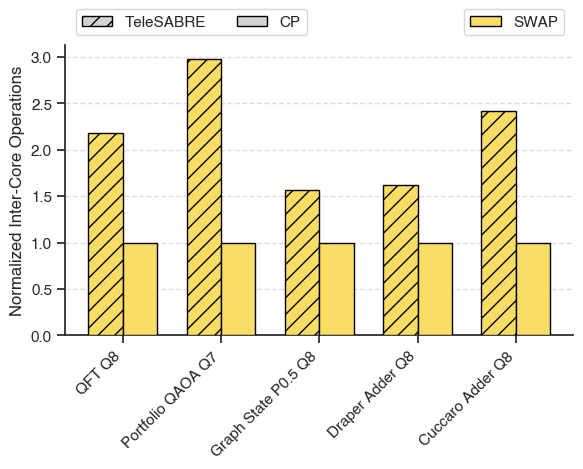

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Helvetica'

cp_data = pd.read_csv('../results/cp_results.csv')
ours_data = pd.read_csv('../cp_results/results.csv')
ours_data = ours_data.loc[ours_data.groupby('circuit')['teledata'].idxmin()]

group_names = []
telegate_data = []
teledata_data = []
for circuit in cp_data.circuit.unique():
    group_names.append(circuit)
    cp_teledata = cp_data.loc[cp_data.circuit == circuit].swap.values[0]
    ours_teledata = ours_data.loc[ours_data.circuit == circuit].swaps.values[0]
    cp_telegate = 0
    ours_telegate = 0
    
    tot_cp = cp_teledata + cp_telegate
    tot_ours = ours_teledata + ours_telegate
    cp_teledata = cp_teledata / tot_cp
    cp_telegate = cp_telegate / tot_cp
    ours_teledata = ours_teledata / tot_cp
    ours_telegate = ours_telegate / tot_cp
    telegate_data.append([ours_telegate, cp_telegate])
    teledata_data.append([ours_teledata, cp_teledata])



name_map = {
    "QFT_8": "QFT Q8",
    "portfolioqaoa_nativegates_ibm_qiskit_opt3_7": "Portfolio QAOA Q7",
    "GraphState_p0": "Graph State P0.5 Q8",
    "DraperQFTAdder_8": "Draper Adder Q8",
    "CDKMRippleCarryAdder_8": "Cuccaro Adder Q8"
}
group_names = [name_map.get(name, name) for name in group_names]

# Convert lists to numpy arrays for easier manipulation
telegate_data = np.array(telegate_data)
teledata_data = np.array(teledata_data)

# Data for the chart
#group_names = ['Group A', 'Group B', 'Group C', 'Group D']
#segment1_data = np.array([[10, 15], [12, 18], [8, 12], [15, 10]])  # First stack segment [bar1, bar2]
#segment2_data = np.array([[5, 8], [7, 4], [10, 6], [7, 12]])       # Second stack segment [bar1, bar2]



# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 5))
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

color = '#f9dd64' 

# Width of each bar
bar_width = 0.35

# Calculate positions of bars
indices = np.arange(len(group_names))
r1 = indices - bar_width/2
r2 = indices + bar_width/2

# Create the bars
# First bar in each group (with hatching)
bottom1 = np.zeros(len(group_names))
p1_1 = ax.bar(r1, telegate_data[:, 0], bar_width, bottom=bottom1, color=color, hatch='//', edgecolor='black', zorder=4)
p1_2 = ax.bar(r1, teledata_data[:, 0], bar_width, bottom=telegate_data[:, 0], color=color, hatch='//', edgecolor='black', zorder=4)

# Second bar in each group (no hatching)
bottom2 = np.zeros(len(group_names))
p2_1 = ax.bar(r2, telegate_data[:, 1], bar_width, bottom=bottom2, color=color, edgecolor='black', zorder=4)
p2_2 = ax.bar(r2, teledata_data[:, 1], bar_width, bottom=telegate_data[:, 1], color=color, edgecolor='black', zorder=4)

# Add labels, title, and legend
ax.set_ylabel('Normalized Inter-Core Operations')
ax.set_xticks(indices)
ax.set_xticklabels(group_names)
#ax.legend()

# 45 degree labels
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability

patches = []
hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', hatch='//', edgecolor="black")
patches.append(hatch_patch)
no_hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', edgecolor="black")  
patches.append(no_hatch_patch)
labels = ["TeleSABRE", "CP"]
legend1 = plt.legend(patches, labels, loc='upper right', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.49, 1.15),)


patches = [plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor="black")]
labels = ["SWAP"]
ax.legend(patches, labels, loc='upper left', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.77, 1.15))
ax.add_artist(legend1)
ax.set_zorder(100)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../figures/ours_vs_cp_intra.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Helvetica'

cp_data = pd.read_csv('../results/cp_results.csv')
ours_data = pd.read_csv('../cp_results/results.csv')
ours_data = ours_data.loc[ours_data.groupby('circuit')['teledata'].idxmin()]

group_names = []
telegate_data = []
teledata_data = []
for circuit in cp_data.circuit.unique():
    group_names.append(circuit)
    cp_teledata = cp_data.loc[cp_data.circuit == circuit].teledata.values[0]
    ours_teledata = ours_data.loc[ours_data.circuit == circuit].teledata.values[0]
    cp_telegate = cp_data.loc[cp_data.circuit == circuit].telegate.values[0]
    ours_telegate = ours_data.loc[ours_data.circuit == circuit].telegate.values[0]
    
    tot_cp = cp_teledata + cp_telegate
    tot_ours = ours_teledata + ours_telegate
    cp_teledata = cp_teledata / tot_cp
    cp_telegate = cp_telegate / tot_cp
    ours_teledata = ours_teledata / tot_cp
    ours_telegate = ours_telegate / tot_cp
    telegate_data.append([ours_telegate, cp_telegate])
    teledata_data.append([ours_teledata, cp_teledata])

# Convert lists to numpy arrays for easier manipulation
telegate_data = np.array(telegate_data)
teledata_data = np.array(teledata_data)

# Data for the chart
#group_names = ['Group A', 'Group B', 'Group C', 'Group D']
#segment1_data = np.array([[10, 15], [12, 18], [8, 12], [15, 10]])  # First stack segment [bar1, bar2]
#segment2_data = np.array([[5, 8], [7, 4], [10, 6], [7, 12]])       # Second stack segment [bar1, bar2]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Width of each bar
bar_width = 0.35

# Calculate positions of bars
indices = np.arange(len(group_names))
r1 = indices - bar_width/2
r2 = indices + bar_width/2

# Create the bars
# First bar in each group (with hatching)
bottom1 = np.zeros(len(group_names))
p1_1 = ax.bar(r1, telegate_data[:, 0], bar_width, bottom=bottom1, color='skyblue', hatch='//', label='Segment 1 - Bar 1')
p1_2 = ax.bar(r1, teledata_data[:, 0], bar_width, bottom=telegate_data[:, 0], color='royalblue', hatch='//', label='Segment 2 - Bar 1')

# Second bar in each group (no hatching)
bottom2 = np.zeros(len(group_names))
p2_1 = ax.bar(r2, telegate_data[:, 1], bar_width, bottom=bottom2, color='skyblue', label='Segment 1 - Bar 2')
p2_2 = ax.bar(r2, teledata_data[:, 1], bar_width, bottom=telegate_data[:, 1], color='royalblue', label='Segment 2 - Bar 2')

# Add labels, title, and legend
ax.set_xlabel('Groups')
ax.set_ylabel('Values')
ax.set_title('Clustered Stacked Bar Chart')
ax.set_xticks(indices)
ax.set_xticklabels(group_names)
ax.legend()

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

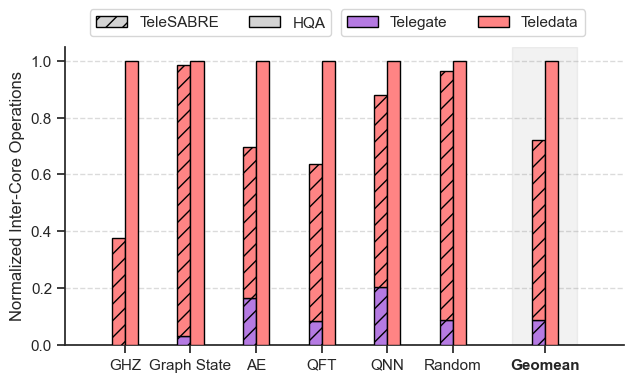

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Arial'

data = pd.read_csv('../results/results_hungarian_64.csv')
data = data[data['valid']]
ours_data = data[data['method'] == "TeleSABRE"]
ours_data = ours_data.loc[ours_data.groupby('circuit')['teledata'].idxmin()]
cp_data = data[data['method'] == "HQA"]

group_names = []
telegate_data = []
teledata_data = []
total_data = []
for circuit in cp_data.circuit.unique():
    group_names.append(circuit)
    cp_teledata = cp_data.loc[cp_data.circuit == circuit].teledata.values[0]
    ours_teledata = ours_data.loc[ours_data.circuit == circuit].teledata.values[0]
    cp_telegate = cp_data.loc[cp_data.circuit == circuit].telegate.values[0] 
    ours_telegate = ours_data.loc[ours_data.circuit == circuit].telegate.values[0]
    
    tot_cp = cp_teledata + cp_telegate
    tot_ours = ours_teledata + ours_telegate
    cp_teledata = cp_teledata / tot_cp
    cp_telegate = cp_telegate / tot_cp
    ours_teledata = ours_teledata / tot_cp
    ours_telegate = ours_telegate / tot_cp
    telegate_data.append([ours_telegate, cp_telegate])
    teledata_data.append([ours_teledata, cp_teledata])
    total_data.append([ours_teledata + ours_telegate, cp_teledata + cp_telegate])

name_map = {
    "ghz_nativegates_ibm_qiskit_opt3_64": "GHZ",
    "graphstate_nativegates_ibm_qiskit_opt3_64": "Graph State",
    "ae_nativegates_ibm_qiskit_opt3_64": "AE",
    "qft_nativegates_ibm_qiskit_opt3_64": "QFT",
    "qnn_nativegates_ibm_qiskit_opt3_64": "QNN",
    "random_nativegates_ibm_qiskit_opt3_64": "Random",
}
group_names = [name_map.get(name, name) for name in group_names]

# Convert lists to numpy arrays for easier manipulation
telegate_data = np.array(telegate_data)
teledata_data = np.array(teledata_data)

# Calculate geometric means
# For each column in our data arrays
geomean_total = np.exp(np.mean(np.log(total_data), axis=0))
telegate_prop = np.mean(telegate_data / (teledata_data + telegate_data), axis=0)

geomean_telegate = telegate_prop * geomean_total
geomean_teledata = (1- telegate_prop) * geomean_total

# Add the geometric mean data to our arrays
telegate_data = np.vstack([telegate_data, geomean_telegate])
teledata_data = np.vstack([teledata_data, geomean_teledata])

# Add the group name for geometric mean
group_names.append("Geomean")

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6.5, 4))
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

color1 = '#b57ae2'
color2 = '#FF8484'

# Width of each bar
bar_width = 0.2

# Calculate positions of bars
indices = np.arange(len(group_names), dtype=float)
indices[-1] = indices[-1] + 0.5 - bar_width/2
r1 = indices - bar_width/2
r2 = indices + bar_width/2

# Create the bars
# First bar in each group (with hatching)
bottom1 = np.zeros(len(group_names))
p1_1 = ax.bar(r1, telegate_data[:, 0], bar_width, bottom=bottom1, color=color1, hatch='//', edgecolor='black', zorder=4)
p1_2 = ax.bar(r1, teledata_data[:, 0], bar_width, bottom=telegate_data[:, 0], color=color2, hatch='//', edgecolor='black', zorder=4)

# Second bar in each group (no hatching)
bottom2 = np.zeros(len(group_names))
p2_1 = ax.bar(r2, telegate_data[:, 1], bar_width, bottom=bottom2, color=color1, edgecolor='black', zorder=4)
p2_2 = ax.bar(r2, teledata_data[:, 1], bar_width, bottom=telegate_data[:, 1], color=color2, edgecolor='black', zorder=4)

# Add labels, title, and legend
ax.set_ylabel('Normalized Inter-Core Operations')
ax.set_xticks(indices)
ax.set_xticklabels(group_names)

# Add a grid for better readability
patches = []
hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', hatch='//', edgecolor="black")
patches.append(hatch_patch)
no_hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', edgecolor="black")  
patches.append(no_hatch_patch)
labels = ["TeleSABRE", "HQA"]
legend1 = plt.legend(patches, labels, loc='upper right', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.49, 1.15),)

patches = [plt.Rectangle((0, 0), 1, 1, fc=color1, edgecolor="black"), plt.Rectangle((0, 0), 1, 1, fc=color2, edgecolor="black")]
labels = ["Telegate", "Teledata"]
ax.legend(patches, labels, loc='upper left', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.48, 1.15))
ax.add_artist(legend1)
ax.set_zorder(100)

# Highlight the Geomean bar
ax.axvspan(indices[-1] - 0.5, indices[-1] + 0.5, alpha=0.1, color='gray', zorder=1)

ax.margins(x=bar_width / 2)
labels = ax.get_xticklabels()
labels[-1].set_fontweight('bold')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../figures/vs_hun.pdf', bbox_inches='tight')
plt.show()

In [99]:
1 - (telegate_data[:, 0] + teledata_data[:, 0])

array([0.625     , 0.01515152, 0.30288462, 0.36363636, 0.11877828,
       0.03492647, 0.27998305])

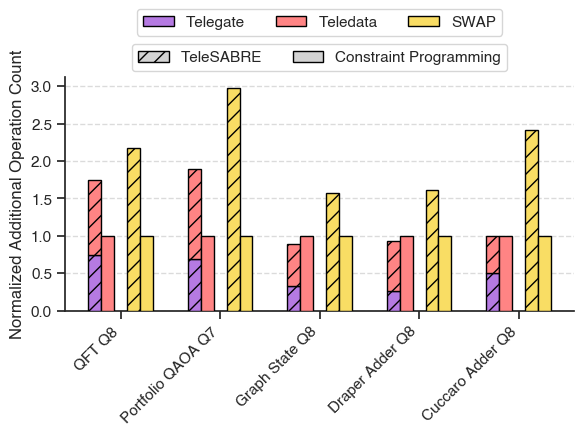

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Helvetica'

cp_data = pd.read_csv('../results/cp_results.csv')

ours_data = pd.read_csv('../cp_results/results.csv')
ours_data = ours_data.loc[ours_data.groupby('circuit')['teledata'].idxmin()]

group_names = []
telegate_data = []
teledata_data = []

swap_data = []
for circuit in cp_data.circuit.unique():
    group_names.append(circuit)
    cp_teledata = cp_data.loc[cp_data.circuit == circuit].teledata.values[0]
    ours_teledata = ours_data.loc[ours_data.circuit == circuit].teledata.values[0]
    cp_telegate = cp_data.loc[cp_data.circuit == circuit].telegate.values[0]
    ours_telegate = ours_data.loc[ours_data.circuit == circuit].telegate.values[0]
    
    tot_cp = cp_teledata + cp_telegate
    tot_ours = ours_teledata + ours_telegate
    cp_teledata = cp_teledata / tot_cp
    cp_telegate = cp_telegate / tot_cp
    ours_teledata = ours_teledata / tot_cp
    ours_telegate = ours_telegate / tot_cp
    telegate_data.append([ours_telegate, cp_telegate])
    teledata_data.append([ours_teledata, cp_teledata])
    
    cp_swap = cp_data.loc[cp_data.circuit == circuit].swap.values[0]
    ours_swap  = ours_data.loc[ours_data.circuit == circuit].swaps.values[0]
    
    swap_data.append([ours_swap / cp_swap, cp_swap / cp_swap])


name_map = {
    "QFT_8": "QFT Q8",
    "portfolioqaoa_nativegates_ibm_qiskit_opt3_7": "Portfolio QAOA Q7",
    "GraphState_p0": "Graph State Q8",
    "DraperQFTAdder_8": "Draper Adder Q8",
    "CDKMRippleCarryAdder_8": "Cuccaro Adder Q8"
}
group_names = [name_map.get(name, name) for name in group_names]

# Convert lists to numpy arrays for easier manipulation
telegate_data = np.array(telegate_data)
teledata_data = np.array(teledata_data)
swap_data = np.array(swap_data)

# Data for the chart
#group_names = ['Group A', 'Group B', 'Group C', 'Group D']
#segment1_data = np.array([[10, 15], [12, 18], [8, 12], [15, 10]])  # First stack segment [bar1, bar2]
#segment2_data = np.array([[5, 8], [7, 4], [10, 6], [7, 12]])       # Second stack segment [bar1, bar2]



# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 5))
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

color1 = '#b57ae2'
color2 = '#FF8484'
color3 = '#f9dd64' 

# Width of each bar
bar_width = 0.13

# Calculate positions of bars
indices = np.arange(len(group_names))
r1 = indices - 2*bar_width
r2 = indices - bar_width

r3 = indices + bar_width
r4 = indices + 2*bar_width

# Create the bars
# First bar in each group (with hatching)
bottom1 = np.zeros(len(group_names))
p1_1 = ax.bar(r1, telegate_data[:, 0], bar_width, bottom=bottom1, color=color1, hatch='//', edgecolor='black', zorder=4)
p1_2 = ax.bar(r1, teledata_data[:, 0], bar_width, bottom=telegate_data[:, 0], color=color2, hatch='//', edgecolor='black', zorder=4)

# Second bar in each group (no hatching)
bottom2 = np.zeros(len(group_names))
p2_1 = ax.bar(r2, telegate_data[:, 1], bar_width, bottom=bottom2, color=color1, edgecolor='black', zorder=4)
p2_2 = ax.bar(r2, teledata_data[:, 1], bar_width, bottom=telegate_data[:, 1], color=color2, edgecolor='black', zorder=4)

p3 = ax.bar(r3, swap_data[:, 0], bar_width, color=color3, hatch='//', edgecolor='black', zorder=4)

# Second bar in each group (no hatching)
p4 = ax.bar(r4, swap_data[:, 1], bar_width, color=color3, edgecolor='black', zorder=4)

# Add labels, title, and legend
ax.set_ylabel('Normalized Additional Operation Count')
ax.set_xticks(indices)
ax.set_xticklabels(group_names)
#ax.legend()

# 45 degree labels
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability

patches = []
hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', hatch='//', edgecolor="black")
patches.append(hatch_patch)
no_hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', edgecolor="black")  
patches.append(no_hatch_patch)
labels = ["TeleSABRE", "Constraint Programming"]
legend1 = plt.legend(patches, labels, loc='upper center', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.5, 1.17))


patches = [plt.Rectangle((0, 0), 1, 1, fc=color1, edgecolor="black"), plt.Rectangle((0, 0), 1, 1, fc=color2, edgecolor="black"), plt.Rectangle((0, 0), 1, 1, fc=color3, edgecolor="black")]
labels = ["Telegate", "Teledata", "SWAP"]
ax.legend(patches, labels, loc='upper center', fontsize='11', ncol=3, frameon=True, bbox_to_anchor=(0.5, 1.32))
ax.add_artist(legend1)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../figures/ours_vs_cp.pdf', bbox_inches='tight')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Helvetica'

cp_data = pd.read_csv('../results/cp_results.csv')
ours_data = pd.read_csv('../cp_results/results.csv')
ours_data = ours_data.loc[ours_data.groupby('circuit')['teledata'].idxmin()]

group_names = []
telegate_data = []
teledata_data = []
for circuit in cp_data.circuit.unique():
    group_names.append(circuit)
    cp_teledata = cp_data.loc[cp_data.circuit == circuit].swap.values[0]
    ours_teledata = ours_data.loc[ours_data.circuit == circuit].swaps.values[0]
    cp_telegate = 0
    ours_telegate = 0
    
    tot_cp = cp_teledata + cp_telegate
    tot_ours = ours_teledata + ours_telegate
    cp_teledata = cp_teledata / tot_cp
    cp_telegate = cp_telegate / tot_cp
    ours_teledata = ours_teledata / tot_cp
    ours_telegate = ours_telegate / tot_cp
    telegate_data.append([ours_telegate, cp_telegate])
    teledata_data.append([ours_teledata, cp_teledata])



name_map = {
    "QFT_8": "QFT Q8",
    "portfolioqaoa_nativegates_ibm_qiskit_opt3_7": "Portfolio QAOA Q7",
    "GraphState_p0": "Graph State P0.5 Q8",
    "DraperQFTAdder_8": "Draper Adder Q8",
    "CDKMRippleCarryAdder_8": "Cuccaro Adder Q8"
}
group_names = [name_map.get(name, name) for name in group_names]

# Convert lists to numpy arrays for easier manipulation
telegate_data = np.array(telegate_data)
teledata_data = np.array(teledata_data)

# Data for the chart
#group_names = ['Group A', 'Group B', 'Group C', 'Group D']
#segment1_data = np.array([[10, 15], [12, 18], [8, 12], [15, 10]])  # First stack segment [bar1, bar2]
#segment2_data = np.array([[5, 8], [7, 4], [10, 6], [7, 12]])       # Second stack segment [bar1, bar2]



# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 5))
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

color = '#f9dd64' 

# Width of each bar
bar_width = 0.35

# Calculate positions of bars
indices = np.arange(len(group_names))
r1 = indices - bar_width/2
r2 = indices + bar_width/2

# Create the bars
# First bar in each group (with hatching)
bottom1 = np.zeros(len(group_names))
p1_1 = ax.bar(r1, telegate_data[:, 0], bar_width, bottom=bottom1, color=color, hatch='//', edgecolor='black', zorder=4)
p1_2 = ax.bar(r1, teledata_data[:, 0], bar_width, bottom=telegate_data[:, 0], color=color, hatch='//', edgecolor='black', zorder=4)

# Second bar in each group (no hatching)
bottom2 = np.zeros(len(group_names))
p2_1 = ax.bar(r2, telegate_data[:, 1], bar_width, bottom=bottom2, color=color, edgecolor='black', zorder=4)
p2_2 = ax.bar(r2, teledata_data[:, 1], bar_width, bottom=telegate_data[:, 1], color=color, edgecolor='black', zorder=4)

# Add labels, title, and legend
ax.set_ylabel('Normalized Inter-Core Operations')
ax.set_xticks(indices)
ax.set_xticklabels(group_names)
#ax.legend()

# 45 degree labels
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability

patches = []
hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', hatch='//', edgecolor="black")
patches.append(hatch_patch)
no_hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', edgecolor="black")  
patches.append(no_hatch_patch)
labels = ["TeleSABRE", "CP"]
legend1 = plt.legend(patches, labels, loc='upper right', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.49, 1.15),)


patches = [plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor="black")]
labels = ["SWAP"]
ax.legend(patches, labels, loc='upper left', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.77, 1.15))
ax.add_artist(legend1)
ax.set_zorder(100)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../figures/ours_vs_cp_intra.pdf', bbox_inches='tight')
plt.show()

## Architecture

,experiment,method,architecture,config,circuit,seed,swaps,teledata,telegate,depth,tp_depth,deadlocks,Unnamed: 12
0,18,TeleSABRE,2x2C 4x4Q - E,default,ghz_nativegates_ibm_qiskit_opt3_25,43,41,0,2,37,24,0,NaN
1,0,TeleSABRE,2x2C 4x4Q - E,default,ghz_nativegates_ibm_qiskit_opt3_25,42,37,2,0,39,23,0,NaN
2,6,TeleSABRE,2x2C 4x4Q - F,default,ghz_nativegates_ibm_qiskit_opt3_25,42,76,2,0,54,42,0,NaN
3,12,TeleSABRE,2x2C 4x4Q - G,default,ghz_nativegates_ibm_qiskit_opt3_25,42,110,3,1,74,62,2,NaN
4,22,TeleSABRE,2x2C 4x4Q - E,default,graphstate_nativegates_ibm_qiskit_opt3_25,43,55,10,2,88,86,0,NaN
5,4,TeleSABRE,2x2C 4x4Q - E,default,graphstate_nativegates_ibm_qiskit_opt3_25,42,53,11,0,85,85,0,NaN
6,24,TeleSABRE,2x2C 4x4Q - F,default,ghz_nativegates_ibm_qiskit_opt3_25,43,125,0,2,86,72,1,NaN
7,30,TeleSABRE,2x2C 4x4Q - G,default,ghz_nativegates_ibm_qiskit_opt3_25,43,58,2,0,31,27,0,NaN
8,10,TeleSABRE,2x2C 4x4Q - F,default,graphstate_nativegates_ibm_qiskit_opt3_25,42,89,10,1,94,94,1,NaN
9,16,TeleSABRE,2x2C 4x4Q - G,default,graphstate_nativegates_ibm_qiskit_opt3_25,42,193,15,2,151,151,3,NaN


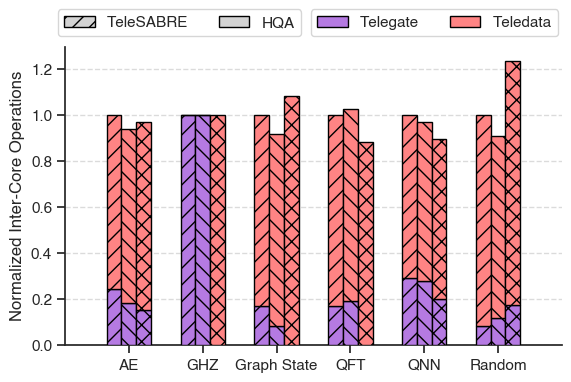

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Helvetica'

data = pd.read_csv('../results/arc_results.csv')

display(data)
data = data.loc[data.groupby(['circuit','architecture'])['teledata'].idxmin()]



group_names = []
telegate_data = []
teledata_data = []
for circuit in data.circuit.unique():
    group_names.append(circuit)
    e_teledata = data.loc[(data.circuit == circuit) & (data.architecture == "2x2C 4x4Q - E")].teledata.values[0]
    e_telegate = data.loc[(data.circuit == circuit) & (data.architecture == "2x2C 4x4Q - E")].telegate.values[0]
    f_teledata = data.loc[(data.circuit == circuit) & (data.architecture == "2x2C 4x4Q - F")].teledata.values[0]
    f_telegate = data.loc[(data.circuit == circuit) & (data.architecture == "2x2C 4x4Q - F")].telegate.values[0]
    g_teledata = data.loc[(data.circuit == circuit) & (data.architecture == "2x2C 4x4Q - G")].teledata.values[0]
    g_telegate = data.loc[(data.circuit == circuit) & (data.architecture == "2x2C 4x4Q - G")].telegate.values[0]
    
    e_tot = e_teledata + e_telegate
    
    telegate_data.append([e_telegate / e_tot, f_telegate / e_tot, g_telegate / e_tot])
    teledata_data.append([e_teledata / e_tot, f_teledata / e_tot, g_teledata / e_tot])



name_map = {
    "ghz_nativegates_ibm_qiskit_opt3_25": "GHZ",
    "graphstate_nativegates_ibm_qiskit_opt3_25": "Graph State",
    "ae_nativegates_ibm_qiskit_opt3_25": "AE",
    "qft_nativegates_ibm_qiskit_opt3_25": "QFT",
    "qnn_nativegates_ibm_qiskit_opt3_25": "QNN",
    "random_nativegates_ibm_qiskit_opt3_25": "Random",
}
group_names = [name_map.get(name, name) for name in group_names]

# Convert lists to numpy arrays for easier manipulation
telegate_data = np.array(telegate_data)
teledata_data = np.array(teledata_data)


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)

color1 = '#b57ae2'
color2 = '#FF8484'

hatch1 = '//'
hatch2 = '\\\\'
hatch3 = 'xx'

# Width of each bar
bar_width = 0.2

# Calculate positions of bars
indices = np.arange(len(group_names))
r1 = indices - bar_width
r2 = indices
r3 = indices + bar_width

# Create the bars
# First bar in each group (with hatching)
bottom1 = np.zeros(len(group_names))
p1_1 = ax.bar(r1, telegate_data[:, 0], bar_width, bottom=bottom1, color=color1, hatch=hatch1, edgecolor='black', zorder=4)
p1_2 = ax.bar(r1, teledata_data[:, 0], bar_width, bottom=telegate_data[:, 0], color=color2, hatch=hatch1, edgecolor='black', zorder=4)

# Second bar in each group (no hatching)
bottom2 = np.zeros(len(group_names))
p2_1 = ax.bar(r2, telegate_data[:, 1], bar_width, bottom=bottom2, color=color1, edgecolor='black',  hatch=hatch2, zorder=4)
p2_2 = ax.bar(r2, teledata_data[:, 1], bar_width, bottom=telegate_data[:, 1], color=color2, edgecolor='black',  hatch=hatch2, zorder=4)

# Second bar in each group (no hatching)
bottom3 = np.zeros(len(group_names))
p3_1 = ax.bar(r3, telegate_data[:, 2], bar_width, bottom=bottom2, color=color1, edgecolor='black', zorder=4,  hatch=hatch3)
p3_2 = ax.bar(r3, teledata_data[:, 2], bar_width, bottom=telegate_data[:, 2], color=color2, edgecolor='black', zorder=4,  hatch=hatch3)

# Add labels, title, and legend
ax.set_ylabel('Normalized Inter-Core Operations')
ax.set_xticks(indices)
ax.set_xticklabels(group_names)
#ax.legend()

# 45 degree labels
#plt.xticks(rotation=45, ha='right')

# Add a grid for better readability

patches = []
hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', hatch='//', edgecolor="black")
patches.append(hatch_patch)
no_hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', edgecolor="black")  
patches.append(no_hatch_patch)
labels = ["TeleSABRE", "HQA"]
legend1 = plt.legend(patches, labels, loc='upper right', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.49, 1.15),)


patches = [plt.Rectangle((0, 0), 1, 1, fc=color1, edgecolor="black"), plt.Rectangle((0, 0), 1, 1, fc=color2, edgecolor="black")]
labels = ["Telegate", "Teledata"]
ax.legend(patches, labels, loc='upper left', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.48, 1.15))
ax.add_artist(legend1)
ax.set_zorder(100)

ax.margins(x=bar_width / 2)

# Adjust layout
plt.tight_layout()

# Show the plot
#plt.savefig('../figures/vs_hun.pdf', bbox_inches='tight')
plt.show()

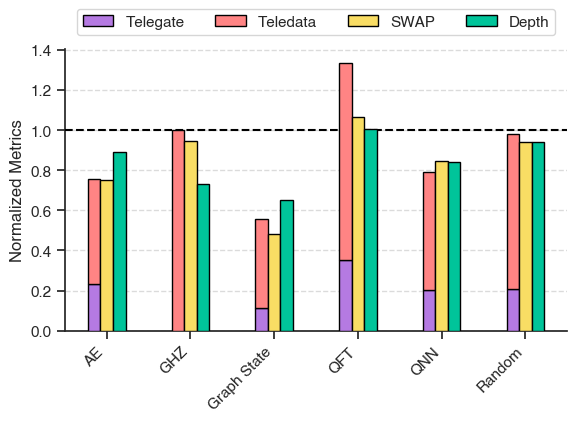

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Helvetica'

data = pd.read_csv('../results/results_initial.csv')

data = data.loc[data['valid']]
data['tot_inter'] = data['teledata'] + data['telegate']
data = data.loc[data.groupby(['circuit','config'])['tot_inter'].idxmin()]

no_data = data[data['config'] == "default"]
si_data = data[data['config'] == "optimize_initial"]

group_names = []

telegate_data = []
teledata_data = []
swap_data = []
depth_data = []

for circuit in data.circuit.unique():
    
    si_teledata = si_data.loc[si_data.circuit == circuit].teledata.values
    no_teledata = no_data.loc[no_data.circuit == circuit].teledata.values
    if len(si_teledata) == 0 or len(no_teledata) == 0:
        continue
    group_names.append(circuit)
    
    si_teledata = si_teledata[0]
    no_teledata = no_teledata[0]
    
    si_telegate = si_data.loc[si_data.circuit == circuit].telegate.values[0]
    no_telegate = no_data.loc[no_data.circuit == circuit].telegate.values[0]
    
    
    tot_inter = no_teledata + no_telegate
    
    si_teledata = si_teledata / tot_inter
    si_telegate = si_telegate / tot_inter
    no_teledata = no_teledata / tot_inter
    no_telegate = no_telegate / tot_inter
    
    telegate_data.append([si_telegate, no_telegate])
    teledata_data.append([si_teledata, no_teledata])
    
    si_swap = si_data.loc[si_data.circuit == circuit].swaps.values[0]
    no_swap  = no_data.loc[no_data.circuit == circuit].swaps.values[0]
    swap_data.append([si_swap / no_swap, no_swap / no_swap])
    
    si_depth = si_data.loc[si_data.circuit == circuit].depth.values[0]
    no_depth = no_data.loc[no_data.circuit == circuit].depth.values[0]
    depth_data.append([si_depth / no_depth, no_depth / no_depth])


name_map = {
    "ghz_nativegates_ibm_qiskit_opt3_26": "GHZ",
    "graphstate_nativegates_ibm_qiskit_opt3_26": "Graph State",
    "ae_nativegates_ibm_qiskit_opt3_26": "AE",
    "qft_nativegates_ibm_qiskit_opt3_26": "QFT",
    "qnn_nativegates_ibm_qiskit_opt3_26": "QNN",
    "random_nativegates_ibm_qiskit_opt3_26": "Random",
}
group_names = [name_map.get(name, name) for name in group_names]

# Convert lists to numpy arrays for easier manipulation
telegate_data = np.array(telegate_data)
teledata_data = np.array(teledata_data)
swap_data = np.array(swap_data)
depth_data = np.array(depth_data)


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.despine()
ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
ax.axhline(1.0, zorder=3, color='black', linestyle='--')

color1 = '#b57ae2'
color2 = '#FF8484'
color3 = '#f9dd64'
color4 = '#00C49A' 

hatch1 = None # '//'
# Width of each bar
bar_width = 0.15

# Calculate positions of bars
indices = np.arange(len(group_names))
r1 = indices - 1*bar_width
#r1 = indices - 3*bar_width + bar_width/2
#r2 = indices - 2*bar_width + bar_width/2

r3 = indices
#r3 = indices - bar_width + bar_width/2
#r4 = indices + bar_width - bar_width/2

r5 = indices + 1*bar_width
#r5 = indices + 2*bar_width - bar_width/2
#r6 = indices + 3*bar_width - bar_width/2

# Create the bars
# First bar in each group (with hatching)
bottom1 = np.zeros(len(group_names))
p1_1 = ax.bar(r1, telegate_data[:, 0], bar_width, bottom=bottom1, color=color1, hatch=hatch1, edgecolor='black', zorder=4)
p1_2 = ax.bar(r1, teledata_data[:, 0], bar_width, bottom=telegate_data[:, 0], color=color2, hatch=hatch1, edgecolor='black', zorder=4)

# Second bar in each group (no hatching)
bottom2 = np.zeros(len(group_names))
#p2_1 = ax.bar(r2, telegate_data[:, 1], bar_width, bottom=bottom2, color=color1, edgecolor='black', zorder=4)
#p2_2 = ax.bar(r2, teledata_data[:, 1], bar_width, bottom=telegate_data[:, 1], color=color2, edgecolor='black', zorder=4)

# swaps
p3 = ax.bar(r3, swap_data[:, 0], bar_width, color=color3, hatch=hatch1, edgecolor='black', zorder=4)
#p4 = ax.bar(r4, swap_data[:, 1], bar_width, color=color3, edgecolor='black', zorder=4)

# depth
p5 = ax.bar(r5, depth_data[:, 0], bar_width, color=color4, hatch=hatch1, edgecolor='black', zorder=4)
#p6 = ax.bar(r6, depth_data[:, 1], bar_width, color=color4, edgecolor='black', zorder=4)

# Add labels, title, and legend
ax.set_ylabel('Normalized Metrics')
ax.set_xticks(indices)
ax.set_xticklabels(group_names)
#ax.legend()

# 45 degree labels
plt.xticks(rotation=45, ha='right')

# Add a grid for better readability

patches = []
hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', hatch='//', edgecolor="black")
patches.append(hatch_patch)
no_hatch_patch = plt.Rectangle((0, 0), 1, 1, fc='lightgray', edgecolor="black")  
patches.append(no_hatch_patch)
labels = ["TeleSABRE", "Constraint Programming"]
legend1 = plt.legend(patches, labels, loc='upper center', fontsize='11', ncol=2, frameon=True, bbox_to_anchor=(0.5, 1.17))


patches = [
    plt.Rectangle((0, 0), 1, 1, fc=color1, edgecolor="black"), 
    plt.Rectangle((0, 0), 1, 1, fc=color2, edgecolor="black"), 
    plt.Rectangle((0, 0), 1, 1, fc=color3, edgecolor="black"),
    plt.Rectangle((0, 0), 1, 1, fc=color4, edgecolor="black")
]
labels = ["Telegate", "Teledata", "SWAP", "Depth"]
ax.legend(patches, labels, loc='upper center', fontsize='11', ncol=4, frameon=True, bbox_to_anchor=(0.5, 1.17))
#ax.add_artist(legend1)


# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig('../figures/initial.pdf', bbox_inches='tight')
plt.show()

In [105]:
print(max(1 - (teledata_data[:, 0] + telegate_data[:, 0])))
print(max(1 - swap_data[:,0]))
print(max(1- depth_data[:,0]))


0.4444444444444444
0.5161290322580645
0.35


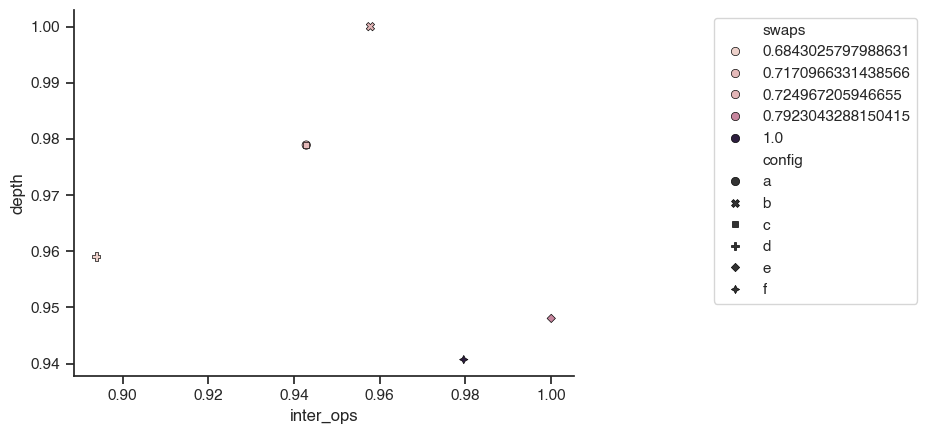

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set_style(style="ticks")

# Set Helvetica font for the plot
plt.rcParams['font.family'] = 'Helvetica'

data = pd.read_csv('../results/results_decay_random.csv')


data = data.loc[data['valid']]
data = data[data['circuit'] == "random_nativegates_ibm_qiskit_opt3_26"]
data['inter_ops'] = data['teledata'] + data['telegate']
data = data.loc[data.groupby(['circuit','config'])['inter_ops'].idxmin()]
data['inter_ops'] = data.groupby('circuit')['inter_ops'].transform(lambda x: (x / x.max()))
data['depth'] = data.groupby('circuit')['depth'].transform(lambda x: (x / x.max()))
data['swaps'] = data.groupby('circuit')['swaps'].transform(lambda x: (x / x.max()))
data['telegate'] = data.groupby('circuit')['telegate'].transform(lambda x: (x / x.max()))
data['teledata'] = data.groupby('circuit')['teledata'].transform(lambda x: (x / x.max()))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.despine()

color1 = '#b57ae2'
color2 = '#FF8484'
color3 = '#f9dd64'
color4 = '#00C49A' 

palette = [color1, color2, color3, color4]

sns.scatterplot(data=data, x='inter_ops', y='depth', style='config', edgecolor='black', alpha=1, hue="swaps")

# Draw Parallel Coordinate Plot


# Adjust layout
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.7, 1), loc='upper right', fontsize='11', frameon=True)

# Show the plot
#plt.savefig('../figures/initial.pdf', bbox_inches='tight')
plt.show()

In [57]:
display(data)

,experiment,method,architecture,config,circuit,seed,swaps,teledata,telegate,depth,tp_depth,deadlocks,valid,inter_ops
8,0,TeleSABRE,2x2C 3x3Q,a,random_nativegates_ibm_qiskit_opt3_26,42,1640,598,95,0.978912,3203,5,True,0.942857
11,1,TeleSABRE,2x2C 3x3Q,b,random_nativegates_ibm_qiskit_opt3_26,42,1658,610,94,1.000000,3249,7,True,0.957823
7,2,TeleSABRE,2x2C 3x3Q,c,random_nativegates_ibm_qiskit_opt3_26,42,1640,598,95,0.978912,3203,5,True,0.942857
0,13,TeleSABRE,2x2C 3x3Q,d,random_nativegates_ibm_qiskit_opt3_26,44,1565,574,83,0.959046,3138,1,True,0.893878
9,14,TeleSABRE,2x2C 3x3Q,e,random_nativegates_ibm_qiskit_opt3_26,44,1812,647,88,0.948044,3096,2,True,1.000000
17,2,TeleSABRE,2x2C 3x3Q,f,random_nativegates_ibm_qiskit_opt3_26,44,2287,612,108,0.940709,3075,0,True,0.979592


<Axes: >

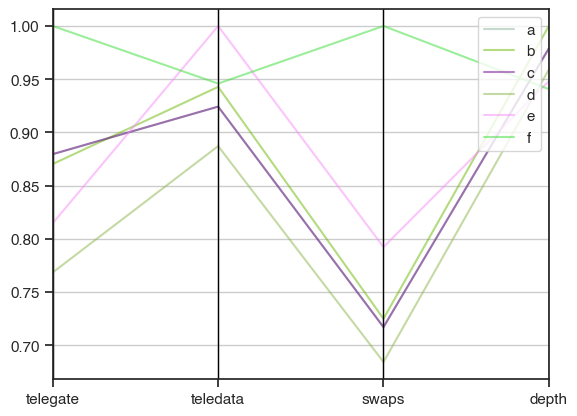

In [59]:
pd.plotting.parallel_coordinates(data, 'config', cols=["telegate", "teledata", "swaps", "depth"], alpha=0.5)